In [62]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import scipy

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: Sara Calle Muñoz
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



In [ ]:
# definimos el método de la derivada de cinco puntos
def five_point_derivative(f, x, h):
    '''
    Calcula la derivada de cinco puntos para una función f en un conjunto de puntos x con paso h.

    Entradas:
    f: función númerica
    x: array, con los valores a los cuales le encontramos f'(x)
    h: float, paso

    Salidas:
    fprime: array, con la derivada númerica
    '''
    if h==0:
        raise ValueError('La derivada no existe')
    n = len(x)
    fprime = np.zeros(n) #generamos un array con el tamaño de x

    for i in range(n):
        if i == 0:
           #derivada adelantada para el primer punto
            fprime[i] = (-25*f(x[i]) + 48*f(x[i] + h) - 36*f(x[i] + 2*h) + 16*f(x[i] + 3*h) - 3*f(x[i] + 4*h))/ (12*h)
        elif i == n-1:
            #derivada atrasada para el último punto
            fprime[i] = (25*f(x[i]) - 48*f(x[i]- h) + 36*f(x[i]-2*h) - 16*f(x[i] - 3*h) + 3*f(x[i] - 4*h))/(12*h)
        else:
          #derivada centrada para los puntos intermedios
            fprime[i] = (f(x[i] - 2*h) - 8*f(x[i] - h) + 8*f(x[i] + h) - f(x[i] + 2*h))/(12*h)
    return fprime

 la derivada utilizando el método de cinco puntos es = [ 3.33881071e-11 -6.42787609e-01 -9.84807753e-01 -8.66025403e-01
 -3.42020143e-01  3.42020143e-01  8.66025403e-01  9.84807753e-01
  6.42787609e-01 -3.33881071e-11]
 la derivada exacta es = [-0.00000000e+00 -6.42787610e-01 -9.84807753e-01 -8.66025404e-01
 -3.42020143e-01  3.42020143e-01  8.66025404e-01  9.84807753e-01
  6.42787610e-01  2.44929360e-16]


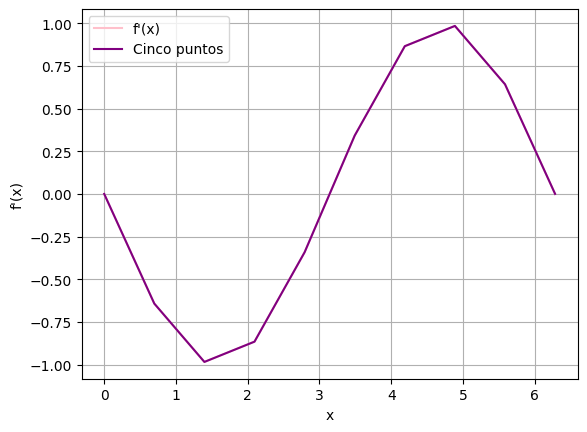

In [ ]:
#calculamos la derivada de f usando un arreglo con diez datos entre 0 y 2pi
f = lambda x: np.cos(x)
x = np.linspace(0, 2*np.pi, 10)
h = 0.01

df_approx = five_point_derivative(f, x, h)
print(f' la derivada utilizando el método de cinco puntos es = {df_approx}')

df_exacta = -np.sin(x)
print(f' la derivada exacta es = {df_exacta}')

plt.plot(x, df_exacta, label='f\'(x)', color = 'pink')
plt.plot(x, df_approx, label='Cinco puntos', color = 'purple')
plt.xlabel('x')
plt.ylabel('f\'(x)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# encontramos la derivada en pi/8 con diferentes h
f = lambda x: np.cos(x)
x = np.array([np.pi/8])
h = [1, 0.5, 0.1, 0.01, 0.001]
df_exacta = -np.sin(x)
error = [] # Guardamos el error

for h_ in h:
  df_approx = five_point_derivative(f, x, h_) # Calculamos diferentes h
  df_exacta = -np.sin(x)
  error.append(np.max(np.abs(df_exacta - df_approx))) # Determinamos el error máximo
  print(f'\nla derivada aproximada con h = {h_} es: {df_approx}')
  print(f'la derivada exacta con h = {h_} es: {df_exacta}')
  print(f'el error con h = {h_} es: {(np.abs(df_exacta - df_approx))}')



la derivada aproximada con h = 1 es: [-0.23174167]
la derivada exacta con h = 1 es: [-0.38268343]
el error con h = 1 es: [0.15094176]

la derivada aproximada con h = 0.5 es: [-0.37138039]
la derivada exacta con h = 0.5 es: [-0.38268343]
el error con h = 0.5 es: [0.01130304]

la derivada aproximada con h = 0.1 es: [-0.38267284]
la derivada exacta con h = 0.1 es: [-0.38268343]
el error con h = 0.1 es: [1.05960471e-05]

la derivada aproximada con h = 0.01 es: [-0.38268343]
la derivada exacta con h = 0.01 es: [-0.38268343]
el error con h = 0.01 es: [7.96070043e-10]

la derivada aproximada con h = 0.001 es: [-0.38268343]
la derivada exacta con h = 0.001 es: [-0.38268343]
el error con h = 0.001 es: [4.18776125e-13]


In [63]:
#definimos la función para encontrar la segunda derivada
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

#encontramos la segunda derivada en pi/8
f = lambda x: np.cos(x)
x = np.array([np.pi/8])
h = (0.05)

df_approx = second_diff(f, x, h)
print(f'la segunda derivada aproximada es con h = {h}: {df_approx}')

#calculamos la derivada exacta
df_exacta = -np.cos(x)
print(f'la segunda derivada exacta es: {df_exacta}')

#calculamos el error de la aproximación
error = np.abs(df_exacta - df_approx)
print(f'el error con h = {h} es: {error}')

#observe que el valor de la derivada es una aproximación aceptable, sin embargo al realizarla con h menor la aproximación mejora considerablemente.
h = (0.001)
df_approx = second_diff(f, x, h)
print(f'la segunda derivada aproximada con h = {h} es: {df_approx}')
error = np.abs(df_exacta - df_approx)
print(f'el error con h = {h} es: {error}')

la segunda derivada aproximada es con h = 0.05: [-0.92368707]
la segunda derivada exacta es: [-0.92387953]
el error con h = 0.05 es: [0.00019246]
la segunda derivada aproximada con h = 0.001 es: [-0.92387946]
el error con h = 0.001 es: [7.70168505e-08]


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

In [64]:
#definimos la función para calcular la derivada con diferencias finitas
def derivada_finita(f, x, h):
    '''
    Calcula la derivada usando diferencias finitas, usando hacia atrás, adelante y centrada
    f'(x) = [f(x+h)-f(x-h)]/h
    Entradas:
    f: función númerica
    x: array, con los valores a los cuales le encontramos f'(x)
    h: float, paso
    Salidas:
    fprime: array, con la derivada númerica
    '''
    if h==0:
        raise ValueError('La derivada no existe')
    n = len(x)
    fprime = np.zeros(n) #generamos un array con el tamaño de x

    for i in range(n):
        if i == 0:
            fprime[i] = (f(x[i]+h)-f(x[i]))/h
        if i == n-1:
            fprime[i] = (f(x[i])-f(x[i]-h))/(h)
        else:
            fprime[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
    return fprime

In [65]:
#definimos la función a derivar y el punto a evaluar
f = lambda x: x*np.exp(x)
x = np.array([2.0])
h = 0.01

#mostramos los resultados
df_approx = derivada_finita(f, x, h)
print(f'la derivada con diferencias finitas es: {df_approx}')

df_exacta = np.exp(x) * (x + 1)
print(f'la derivada exacta es: {df_exacta}')

df2_approx = second_diff(f, x, h)
print(f'la segunda derivada con diferencias finitas es: {df2_approx}')

df2_exacta = np.exp(x) * (x + 2)
print(f'la segunda derivada exacta es: {df2_exacta}')

la derivada con diferencias finitas es: [22.02000109]
la derivada exacta es: [22.1671683]
la segunda derivada con diferencias finitas es: [29.55659385]
la segunda derivada exacta es: [29.5562244]


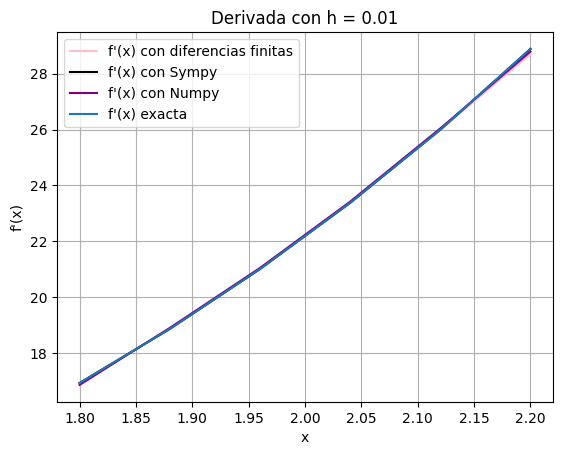

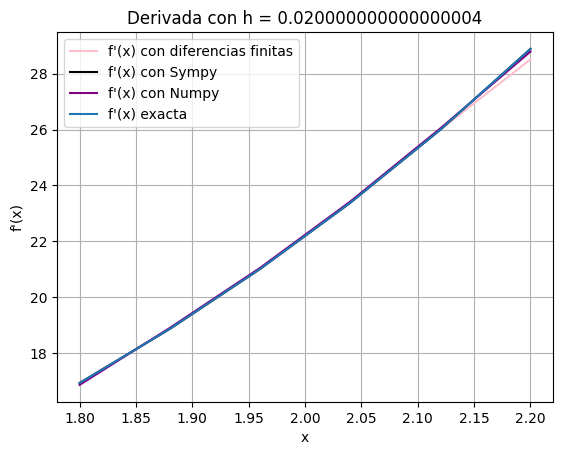

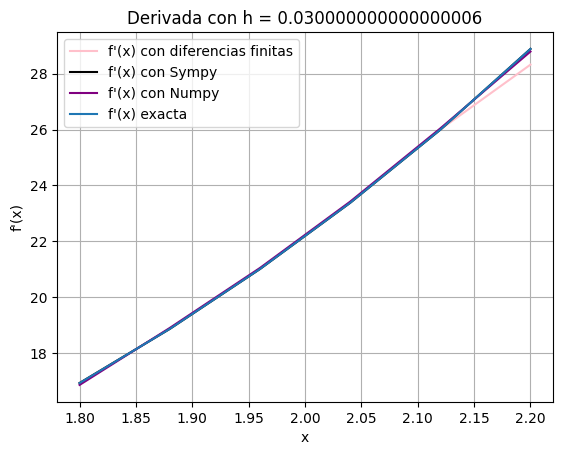

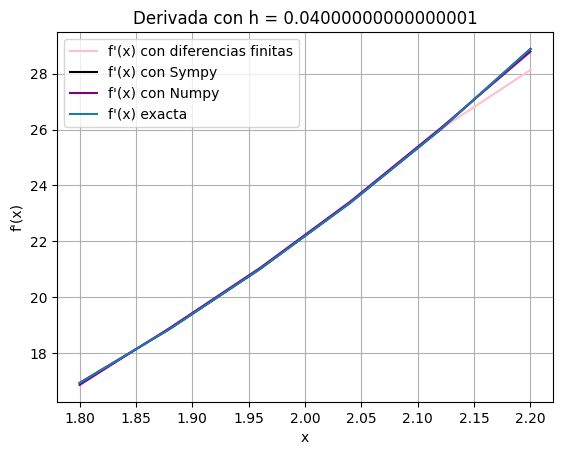

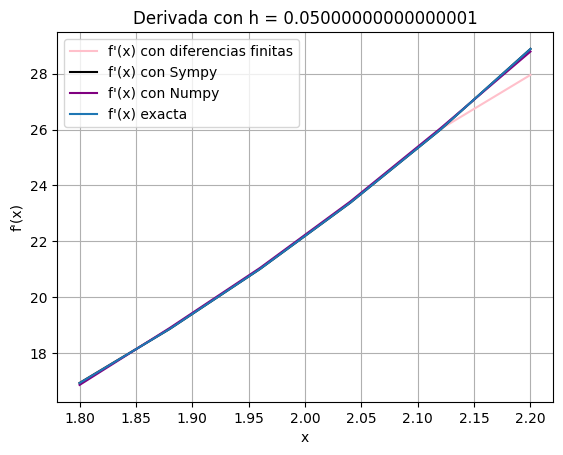

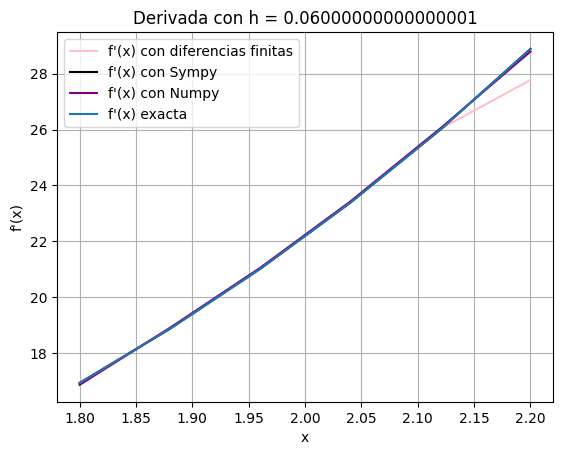

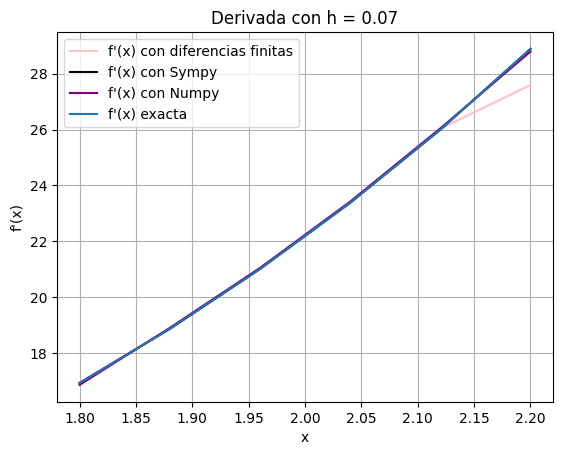

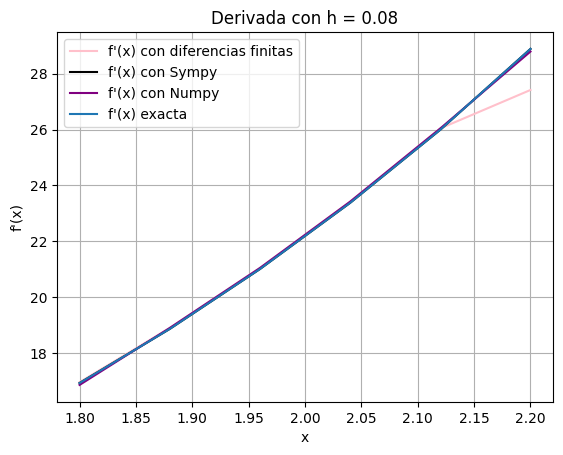

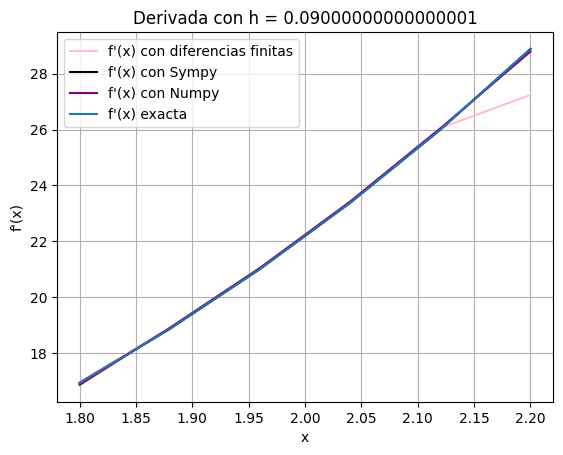

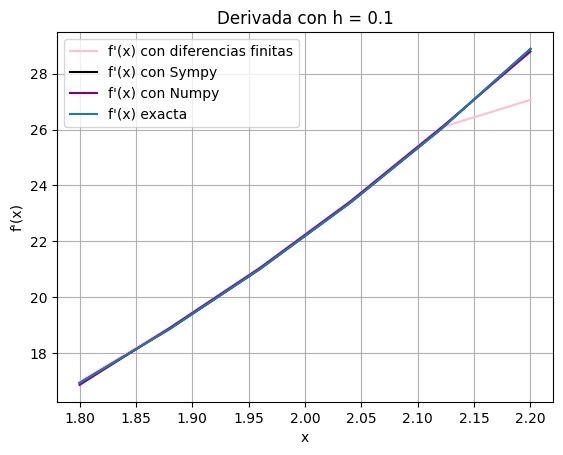

In [81]:
#definimos la función y su derivada exacta
f = lambda x: x*np.exp(x)
x = np.linspace(1.8, 2.2, 6) #puntos para calcular la derivada
h = np.linspace(0.01, 0.1, 10) #diferentes valores de h (paso)
y = f(x)
df_exacta = np.exp(x) * (x + 1)

#para la derivada con sympy
x_sympy = sp.Symbol('x')
f_sympy = x_sympy * sp.exp(x_sympy)

#para guarrdar el error
error = []
error_sympy = []
error_numpy = []


#calculamos la derivada con los tres métodos y calculamos su error comparando con la derivada exacta
for h_ in h:
  df_approx = derivada_finita(f, x, h_) #calculamos diferentes h
  df_numpy = np.gradient(y, x, edge_order= 2)
  df_sympy = np.array([sp.diff(f_sympy, x_sympy).subs(x_sympy, val) for val in x])

  #calculamos el error
  error.append(np.max(np.abs(df_exacta - df_approx)))
  error_sympy.append(np.max(np.abs(df_exacta - df_sympy)))
  error_numpy.append(np.max(np.abs(df_exacta - df_numpy)))

  plt.figure()
  plt.title(f'Derivada con h = {h_}')
  plt.plot(x, df_approx, label='f\'(x) con diferencias finitas', color = 'pink')
  plt.plot(x, df_sympy, label='f\'(x) con Sympy', color = 'black')
  plt.plot(x, df_numpy, label='f\'(x) con Numpy', color = 'purple')
  plt.plot(x, df_exacta, label='f\'(x) exacta')
  plt.xlabel('x')
  plt.ylabel('f\'(x)')
  plt.legend()
  plt.grid()

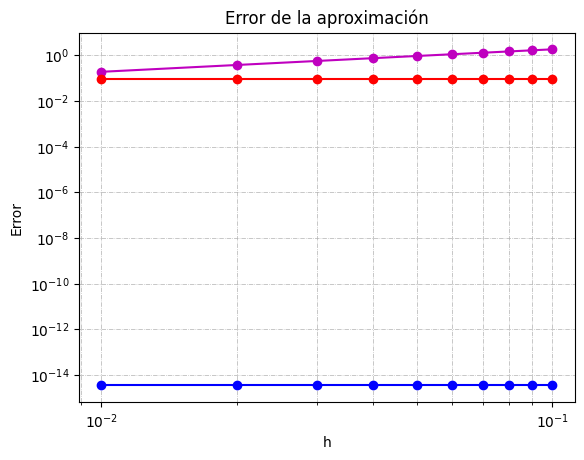

In [82]:
#gráfica para el error
plt.figure()
plt.plot(h, error, 'mo-')
plt.plot(h, error_sympy, 'bo-')
plt.plot(h, error_numpy, 'ro-')
plt.semilogx()
plt.semilogy()
plt.title('Error de la aproximación')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid(True, which="both", linestyle='-.', linewidth=0.5)
plt.show()

In [83]:
#el valor optimo de h será donde el error sea más pequeño
h_opt = h[np.argmin(error)]
print(f'El valor óptimo de h es: {h_opt}')

El valor óptimo de h es: 0.01
